<a href="https://colab.research.google.com/github/pragyan7/ML-projects/blob/main/movie_recommender_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🎬 Movie Recommender System Using Cosine Similarity (MovieLens)**

✅ STEP 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from ipywidgets import interact, widgets
import warnings
warnings.filterwarnings('ignore')

✅ STEP 2: Download & Load MovieLens Data

In [2]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip -q ml-latest-small.zip

--2025-07-01 08:49:25--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.2’

ml-latest-small.zip 100%[===================>] 955.28K  2.40MB/s    in 0.4s    

2025-07-01 08:49:26 (2.40 MB/s) - ‘ml-latest-small.zip.2’ saved [978202/978202]

replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')

In [3]:
print(ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [4]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [5]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [6]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [7]:
print(f"Ratings shape: {ratings.shape}")
print(f"Movies shape: {movies.shape}")

Ratings shape: (100836, 4)
Movies shape: (9742, 3)


✅ STEP 3: Explore Rating Distribution

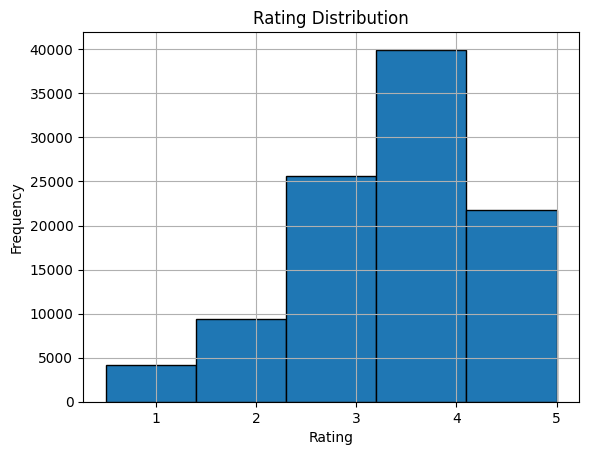

In [8]:
ratings['rating'].hist(bins=5, edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

✅ STEP 4: Merge Ratings with Movies

In [9]:
data = pd.merge(ratings, movies, on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


✅ STEP 5: Create User-Movie Matrix

In [10]:
user_movie_matrix = data.pivot_table(index='userId', columns='title', values='rating')
print(user_movie_matrix)

# popular_movies = user_movie_matrix.mean().sort_values(ascending=False)
# print(popular_movies.head(10)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   
...            ...                                      ...   
606            NaN                                      NaN   
607            NaN                                      NaN   
608            NaN                                      NaN   
609            NaN                                      NaN   
610            4.0                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2              

In [12]:
user_movie_matrix_filled = user_movie_matrix.fillna(0)
print(user_movie_matrix_filled)
print(f"Matrix shape: {user_movie_matrix_filled.shape}")

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              0.0                                      0.0   
2              0.0                                      0.0   
3              0.0                                      0.0   
4              0.0                                      0.0   
5              0.0                                      0.0   
...            ...                                      ...   
606            0.0                                      0.0   
607            0.0                                      0.0   
608            0.0                                      0.0   
609            0.0                                      0.0   
610            4.0                                      0.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                  0.0   
2              

✅ STEP 6: Calculate Movie Similarity Matrix

In [13]:
movie_similarity = cosine_similarity(user_movie_matrix_filled.T)
movie_similarity_df = pd.DataFrame(movie_similarity,
                                   index=user_movie_matrix.columns,
                                   columns=user_movie_matrix.columns)
print(movie_similarity_df)

title                                      '71 (2014)  \
title                                                   
'71 (2014)                                   1.000000   
'Hellboy': The Seeds of Creation (2004)      0.000000   
'Round Midnight (1986)                       0.000000   
'Salem's Lot (2004)                          0.000000   
'Til There Was You (1997)                    0.000000   
...                                               ...   
eXistenZ (1999)                              0.000000   
xXx (2002)                                   0.139431   
xXx: State of the Union (2005)               0.327327   
¡Three Amigos! (1986)                        0.000000   
À nous la liberté (Freedom for Us) (1931)    0.000000   

title                                      'Hellboy': The Seeds of Creation (2004)  \
title                                                                                
'71 (2014)                                                                0.000000   


✅ STEP 7: Define Recommendation Function

In [14]:
def recommend_movies(movie_title, num_recommendations=5):
    if movie_title not in movie_similarity_df.columns:
        return f"❌ '{movie_title}' not found in the dataset."

    similar_scores = movie_similarity_df[movie_title].sort_values(ascending=False)
    top_movies = similar_scores.iloc[1:num_recommendations+1]
    return top_movies

✅ STEP 8: Plot Recommendations as Bar Chart

In [15]:
def plot_recommendations(movie_title):
    recs = recommend_movies(movie_title)

    if isinstance(recs, str):
        print(recs)
    else:
        recs.plot(kind='barh', title=f"🎥 Top Recommendations for: {movie_title}",
                  color='skyblue')
        plt.xlabel("Similarity Score")
        plt.gca().invert_yaxis()
        plt.show()

✅ STEP 9: Add Interactivity using ipywidgets

In [18]:
# @interact
# def show_recommendations(movie=widgets.Dropdown(options=sorted(movie_similarity_df.columns), description="Select Movie:")):
#     plot_recommendations(movie)

In [17]:
print(recommend_movies('Toy Story (1995)', 5))

title
Toy Story 2 (1999)                           0.572601
Jurassic Park (1993)                         0.565637
Independence Day (a.k.a. ID4) (1996)         0.564262
Star Wars: Episode IV - A New Hope (1977)    0.557388
Forrest Gump (1994)                          0.547096
Name: Toy Story (1995), dtype: float64


✅ Final Section (Optional): Future Work & Next Steps

In [ ]:
## 🚀 Future Improvements

- Add genre-based filtering or boost scores by popularity
- Normalize user ratings to improve similarity
- Build a Streamlit app for deployment
- Use matrix factorization (e.g., SVD) for collaborative filtering
- Evaluate performance with recall@k or precision@k

---

## 💬 Acknowledgment

Dataset used: [MovieLens Latest Small Dataset](https://grouplens.org/datasets/movielens/latest/)

Author: Pragyan Dash
